In [4]:
from quant_utils.db_conn import DB_CONN_JJTG_DATA
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, skew, kurtosis
import numpy as np
def hist_distribution(
        data_df: pd.DataFrame, period="M", bins: int = 50, 
        date_coloumn="TradingDay", colse_column = "ClosePrice"
):
    df = data_df.copy()
    df[colse_column] = df[colse_column].astype(float)

    df[date_coloumn] = pd.to_datetime(df[date_coloumn])
    df_period = df.set_index(date_coloumn)[[colse_column]].resample(period).last()
    df_period["ret"] = df_period[colse_column].pct_change()
    df_period.dropna(inplace=True)

    # 计算收益率的均值和标准差
    mean = df_period["ret"].mean()
    std = df_period["ret"].std()

    # 生成正态分布的随机数
    x = np.linspace(mean - 3 * std, mean + 3 * std, 100)
    y = norm.pdf(x, mean, std)

    # 绘制收益率的直方图
    plt.hist(df_period["ret"], bins=bins, density=True, alpha=0.5)

    # 绘制正态分布的曲线
    plt.plot(x, y, 'r', linewidth=2)

    # 添加图例和标题
    plt.legend(['Normal Distribution', 'Returns'])
    plt.title('Returns Histogram and Normal Distribution')

    # 显示图形
    plt.show()
    print(f"skew: {skew(df_period['ret'])}, kurtosis: {kurtosis(df_period['ret'])}") 
    print(df_period["ret"].describe())

In [5]:
%matplotlib inline
query_sql = """
SELECT * FROM `chentiancheng`.`jy_indexquote` WHERE `SecuCode` = '000300' 
"""
df = DB_CONN_JJTG_DATA.exec_query(query_sql)
hist_distribution(data_df=df, period="D")

KeyboardInterrupt: 

C:\Users\Wilcoxon\AppData\Local\Temp\ipykernel_23204\3633078709.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_period = df.set_index(date_coloumn)[[colse_column]].resample(period).last()


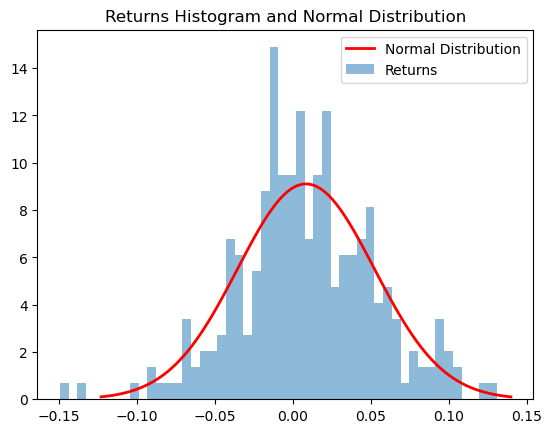

skew: -0.08485987728636657, kurtosis: 0.6523443828356794
count    264.000000
mean       0.008576
std        0.043804
min       -0.149157
25%       -0.015948
50%        0.006131
75%        0.036392
max        0.130808
Name: ret, dtype: float64


In [10]:
from quant_utils.db_conn import DB_CONN_JJTG_DATA
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, skew, kurtosis
import numpy as np


query_sql = """
SELECT
  TradeDate AS TradingDay,
  'AU9999' AS TICKER_SYMBOL,
  ClosePrice 
FROM
  `qt_goldtrademarket` 
WHERE
  1 = 1 
  AND TradeVariety = 3 
  AND DateType = 3 
ORDER BY
  TradingDay
"""
df = DB_CONN_JJTG_DATA.exec_query(query_sql)
df["ClosePrice"] = df["ClosePrice"].astype(float)

df["TradingDay"] = pd.to_datetime(df["TradingDay"])
hist_distribution(df, period='M')

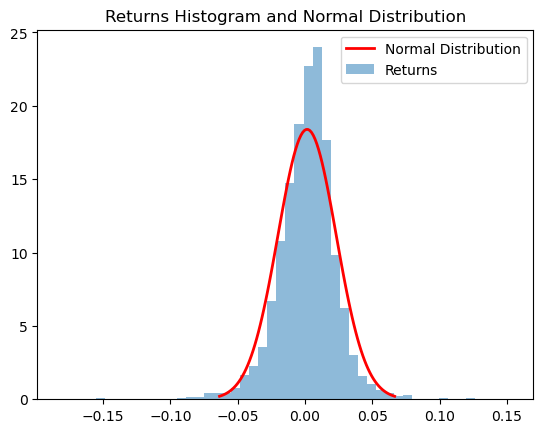

skew: -0.36416358013991257, kurtosis: 5.557418361838069
count    4529.000000
mean        0.001615
std         0.021683
min        -0.181955
25%        -0.009933
50%         0.002984
75%         0.013830
max         0.153051
Name: ret, dtype: float64


In [12]:
query_sql = """
    SELECT 
        * 
    FROM 
        global_index_eod_jy 
    WHERE 
        1=1
        and TICKER_SYMBOL = 'SPX'
        and TRADE_DT >= '19380101'
"""
df = DB_CONN_JJTG_DATA.exec_query(query_sql)
hist_distribution(df, date_coloumn="TRADE_DT", colse_column="S_DQ_CLOSE", period="W")

<Axes: xlabel='END_DATE'>

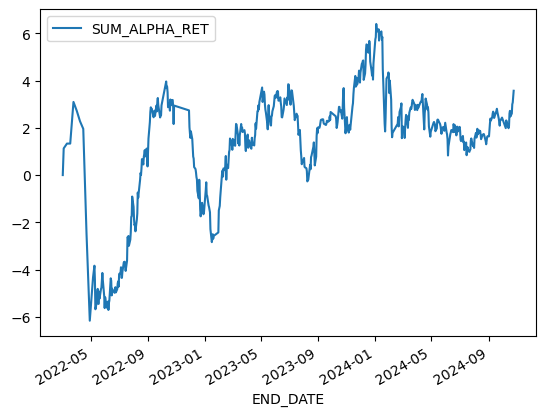

In [21]:
from data_functions.fund_data import get_fund_alpha_to_index
import pandas as pd
%matplotlib inline
ticker_symbol = '015006'
index_code = '930950'
df = get_fund_alpha_to_index(ticker_symbol=ticker_symbol, index_code=index_code, start_date='20220101')
df.fillna(0, inplace=True)
df["END_DATE"] = pd.to_datetime(df["END_DATE"])
df.set_index('END_DATE', inplace=True)
df[["SUM_ALPHA_RET"]].plot()

In [19]:
from quant_utils.db_conn import DB_CONN_JJTG_DATA
import numpy as np
%matplotlib inline
query_sql = """
select
    *
from
    jy_indexquote
where
    1=1
    and secucode in ("000300", "000905", "000852", "000922")
"""
df = DB_CONN_JJTG_DATA.exec_query(query_sql)

In [20]:
ret = df.pivot_table(index='TradingDay', columns='SecuCode', values='ClosePrice', aggfunc='last').dropna().pct_change().dropna() 

In [21]:

ret["avg"] = ret.apply(lambda x: np.mean(x), axis=1)

In [22]:
ret["NAV"] = (ret["avg"] + 1).cumprod()

<Axes: xlabel='TradingDay'>

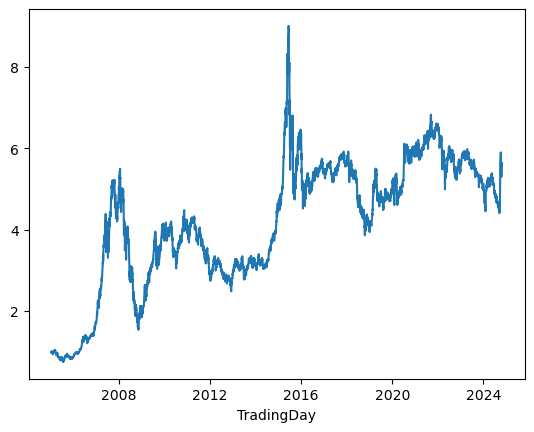

In [23]:
ret["NAV"].plot()